In [90]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
from scipy.stats import pearsonr 

In [91]:
datamr=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series/coviddata_mar.xlsx")
dataap=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_apr.csv")
datamy=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_may.csv")
datajn=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_june.csv")
datajly=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_jly.xlsx")
dataaug=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_aug.xlsx")
dataspt=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_spt.xlsx")
dataoct=pd.read_excel(r"C:\Users\Mark 1\coviddata_oct.xlsx")

In [92]:
datamr.head()

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,31,2020-03-01,0,3,0,3,0,0
1,32,2020-03-02,2,5,0,3,0,0
2,33,2020-03-03,1,6,0,3,0,0
3,34,2020-03-04,22,28,0,3,0,0
4,35,2020-03-05,2,30,0,3,0,0


,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,31,2020-03-01,0,3,0,3,0,0
1,32,2020-03-02,2,5,0,3,0,0
2,33,2020-03-03,1,6,0,3,0,0
3,34,2020-03-04,22,28,0,3,0,0
4,35,2020-03-05,2,30,0,3,0,0


In [93]:
dataap.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01-Apr,424,2059,19,169,6,53
1,02-Apr,486,2545,22,191,16,69
2,03-Apr,560,3105,39,230,14,83
3,04-Apr,579,3684,56,286,13,96
4,05-Apr,609,4293,43,329,22,118


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01-Apr,424,2059,19,169,6,53
1,02-Apr,486,2545,22,191,16,69
2,03-Apr,560,3105,39,230,14,83
3,04-Apr,579,3684,56,286,13,96
4,05-Apr,609,4293,43,329,22,118


In [94]:
date=dataap["Date"]
date=list(date)

In [95]:
for i in range(len(date)):
    date[i]=date[i].strip("-Apr")
    

In [96]:
for i in range(len(date)):
    date[i]="2020-04-"+date[i]


In [97]:
dataap["Date"]=date

In [98]:
dataap['Date'] = dataap['Date'].astype('datetime64[ns]') 
dataap.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-04-01,424,2059,19,169,6,53
1,2020-04-02,486,2545,22,191,16,69
2,2020-04-03,560,3105,39,230,14,83
3,2020-04-04,579,3684,56,286,13,96
4,2020-04-05,609,4293,43,329,22,118


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-04-01,424,2059,19,169,6,53
1,2020-04-02,486,2545,22,191,16,69
2,2020-04-03,560,3105,39,230,14,83
3,2020-04-04,579,3684,56,286,13,96
4,2020-04-05,609,4293,43,329,22,118


In [99]:
date=datamy["Date"]
date=list(date)

In [100]:
for i in range(len(date)):
    date[i]=date[i].strip("-May")
    

In [101]:
for i in range(len(date)):
    date[i]="2020-05-"+date[i]


In [102]:
datamy["Date"]=date

In [103]:
datamy['Date'] = datamy['Date'].astype('datetime64[ns]') 
datamy.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-05-01,2396,37262,962,10021,77,1231
1,2020-05-02,2564,39826,831,10852,92,1323
2,2020-05-03,2952,42778,911,11763,140,1463
3,2020-05-04,3656,46434,1082,12845,103,1566
4,2020-05-05,2971,49405,1295,14140,128,1694


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-05-01,2396,37262,962,10021,77,1231
1,2020-05-02,2564,39826,831,10852,92,1323
2,2020-05-03,2952,42778,911,11763,140,1463
3,2020-05-04,3656,46434,1082,12845,103,1566
4,2020-05-05,2971,49405,1295,14140,128,1694


In [104]:
date=datajn["Date"]
date=list(date)

In [105]:
for i in range(len(date)):
    date[i]=date[i].strip("-Jun")
    

In [106]:
for i in range(len(date)):
    date[i]="2020-06-"+date[i]


In [107]:
datajn["Date"]=date

In [108]:
datajn['Date'] = datajn['Date'].astype('datetime64[ns]') 
datajn.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-06-01,7723,198372,3882,95744,201,5607
1,2020-06-02,8812,207187,4531,100275,222,5829
2,2020-06-03,9689,216876,3789,104064,259,6088
3,2020-06-04,9847,226723,4390,108454,274,6362
4,2020-06-05,9472,236195,4770,113224,286,6648


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-06-01,7723,198372,3882,95744,201,5607
1,2020-06-02,8812,207187,4531,100275,222,5829
2,2020-06-03,9689,216876,3789,104064,259,6088
3,2020-06-04,9847,226723,4390,108454,274,6362
4,2020-06-05,9472,236195,4770,113224,286,6648


In [109]:
dt_mrgd=pd.concat([datamr,dataap,datamy,datajn,datajly,dataaug,dataspt,dataoct],axis=0)
dt_mrgd = dt_mrgd.loc[:, ~dt_mrgd.columns.str.contains('^Unnamed')]
dt_mrgd.reset_index(inplace = True, drop = True) 
dt_mrgd

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-01,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0
2,2020-03-03,1,6,0,3,0,0
3,2020-03-04,22,28,0,3,0,0
4,2020-03-05,2,30,0,3,0,0
...,...,...,...,...,...,...,...
225,2020-10-12,54262,7173571,78365,6224767,710,109308
226,2020-10-13,63717,7237288,74079,6298846,727,110035
227,2020-10-14,67811,7305099,81582,6380428,690,110725
228,2020-10-15,63441,7368540,70792,6451220,882,111607


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-01,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0
2,2020-03-03,1,6,0,3,0,0
3,2020-03-04,22,28,0,3,0,0
4,2020-03-05,2,30,0,3,0,0
...,...,...,...,...,...,...,...
225,2020-10-12,54262,7173571,78365,6224767,710,109308
226,2020-10-13,63717,7237288,74079,6298846,727,110035
227,2020-10-14,67811,7305099,81582,6380428,690,110725
228,2020-10-15,63441,7368540,70792,6451220,882,111607


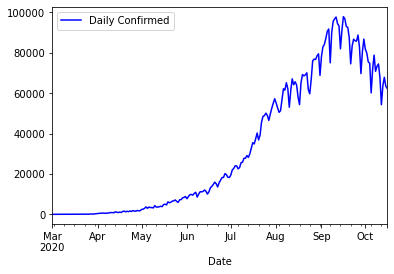

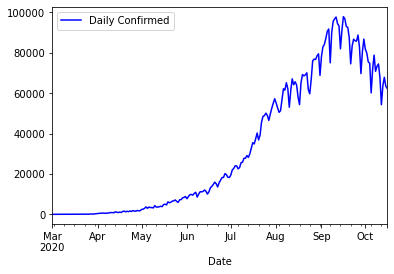

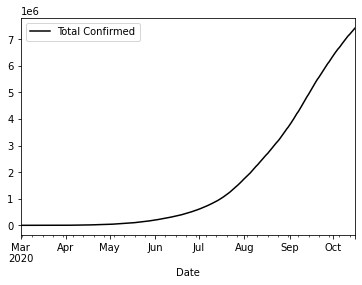

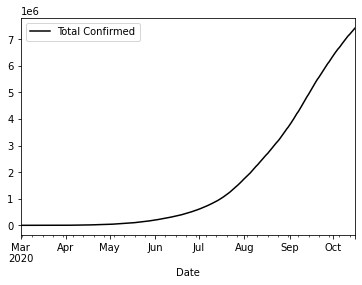

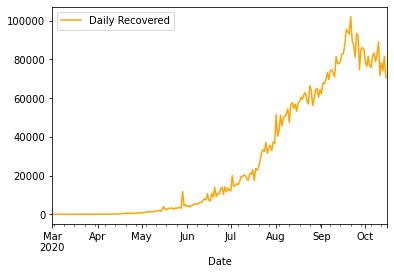

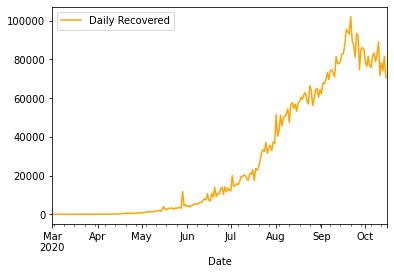

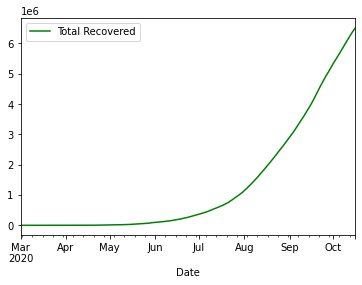

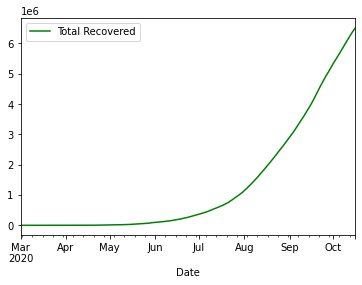

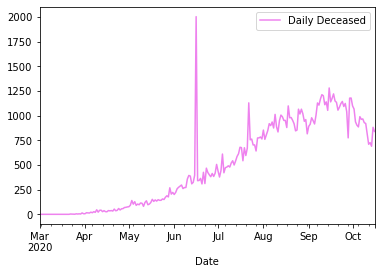

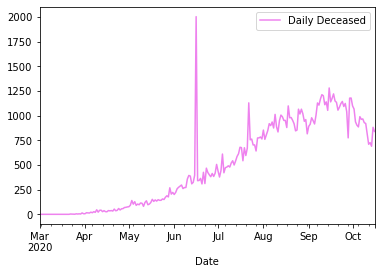

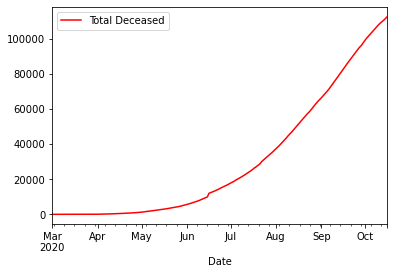

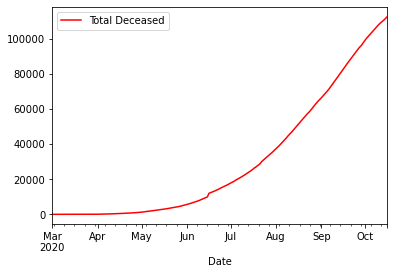

In [110]:
colss=list(dt_mrgd.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    dt_mrgd.plot(x="Date",y=m,color=n)

In [111]:
dt_mrgd_diff=dt_mrgd.copy()
dt_mrgd_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-01,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0
2,2020-03-03,1,6,0,3,0,0
3,2020-03-04,22,28,0,3,0,0
4,2020-03-05,2,30,0,3,0,0


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-01,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0
2,2020-03-03,1,6,0,3,0,0
3,2020-03-04,22,28,0,3,0,0
4,2020-03-05,2,30,0,3,0,0


In [112]:
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
existing_cols=list(dt_mrgd_diff.columns)
existing_cols.pop(0)
existing_cols
for i,j in zip(new_cols,existing_cols):
    dt_mrgd_diff[i]=list(range(len(dt_mrgd_diff)))
    dt_mrgd_diff[i][0]=dt_mrgd_diff[j][0]
    for k in range(0,len(dt_mrgd_diff)-1):
        dt_mrgd_diff[i][k+1]=dt_mrgd_diff[j][k+1]-dt_mrgd_diff[j][k]
        

<ipython-input-112-20fe458c53e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_diff[i][0]=dt_mrgd_diff[j][0]
<ipython-input-112-20fe458c53e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_diff[i][k+1]=dt_mrgd_diff[j][k+1]-dt_mrgd_diff[j][k]
<ipython-input-112-20fe458c53e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_diff[i][0]=dt_mrgd_diff[j][0]
<ipython-input-112-20fe458c53e6>:9: SettingWithCopyWarni

In [113]:
dt_mrgd_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
0,2020-03-01,0,3,0,3,0,0,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0,2,2,0,0,0,0
2,2020-03-03,1,6,0,3,0,0,-1,1,0,0,0,0
3,2020-03-04,22,28,0,3,0,0,21,22,0,0,0,0
4,2020-03-05,2,30,0,3,0,0,-20,2,0,0,0,0


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
0,2020-03-01,0,3,0,3,0,0,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0,2,2,0,0,0,0
2,2020-03-03,1,6,0,3,0,0,-1,1,0,0,0,0
3,2020-03-04,22,28,0,3,0,0,21,22,0,0,0,0
4,2020-03-05,2,30,0,3,0,0,-20,2,0,0,0,0


In [114]:
dt_mrgd_diff["Total Confirmed"][4]-dt_mrgd_diff["Total Confirmed"][3]==dt_mrgd_diff["Total_Confirmed_Diff"][4]

True

True

In [115]:
dt_mrgd_diff.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
count,230.000000,2.300000e+02,230.000000,2.300000e+02,230.0000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.0000
mean,32306.800000,1.706991e+06,28355.569565,1.322964e+06,488.9000,30435.943478,270.878261,32308.008696,306.817391,28355.600000,3.652174,488.9000
std,33054.537418,2.248769e+06,32062.482932,1.880449e+06,428.1582,35116.240592,3905.023511,33055.359063,3874.781254,32062.498791,171.337510,428.1582
min,0.000000,3.000000e+00,0.000000,3.000000e+00,0.0000,0.000000,-16710.000000,1.000000,-17674.000000,0.000000,-1663.000000,0.0000
25%,1729.000000,2.993350e+04,637.500000,7.262000e+03,61.5000,956.250000,-320.500000,1729.000000,-367.750000,637.500000,-21.750000,61.5000
50%,16393.000000,4.645540e+05,11683.000000,2.651445e+05,398.5000,14696.000000,64.500000,16391.500000,6.500000,11683.000000,1.000000,398.5000
75%,63918.750000,2.887224e+06,58868.750000,2.142466e+06,902.0000,54741.750000,1177.250000,63918.750000,1252.750000,58868.750000,21.000000,902.0000
max,97860.000000,7.430842e+06,102070.000000,6.521788e+06,2004.0000,112447.000000,14840.000000,97860.000000,14814.000000,102070.000000,1608.000000,2004.0000


,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
count,230.000000,2.300000e+02,230.000000,2.300000e+02,230.0000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.0000
mean,32306.800000,1.706991e+06,28355.569565,1.322964e+06,488.9000,30435.943478,270.878261,32308.008696,306.817391,28355.600000,3.652174,488.9000
std,33054.537418,2.248769e+06,32062.482932,1.880449e+06,428.1582,35116.240592,3905.023511,33055.359063,3874.781254,32062.498791,171.337510,428.1582
min,0.000000,3.000000e+00,0.000000,3.000000e+00,0.0000,0.000000,-16710.000000,1.000000,-17674.000000,0.000000,-1663.000000,0.0000
25%,1729.000000,2.993350e+04,637.500000,7.262000e+03,61.5000,956.250000,-320.500000,1729.000000,-367.750000,637.500000,-21.750000,61.5000
50%,16393.000000,4.645540e+05,11683.000000,2.651445e+05,398.5000,14696.000000,64.500000,16391.500000,6.500000,11683.000000,1.000000,398.5000
75%,63918.750000,2.887224e+06,58868.750000,2.142466e+06,902.0000,54741.750000,1177.250000,63918.750000,1252.750000,58868.750000,21.000000,902.0000
max,97860.000000,7.430842e+06,102070.000000,6.521788e+06,2004.0000,112447.000000,14840.000000,97860.000000,14814.000000,102070.000000,1608.000000,2004.0000


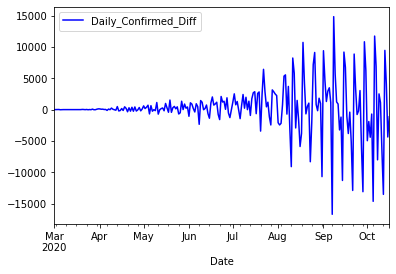

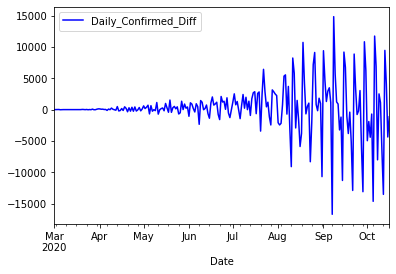

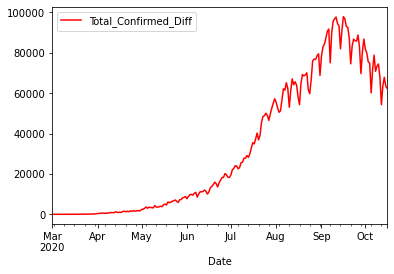

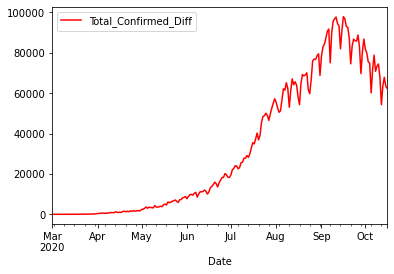

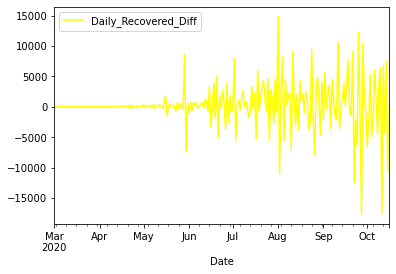

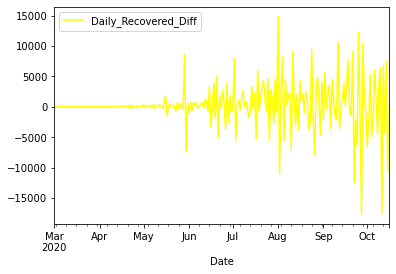

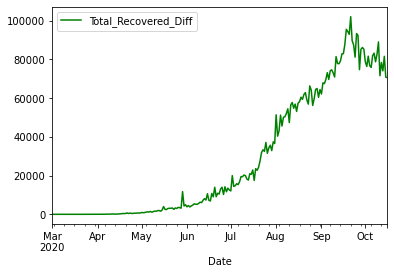

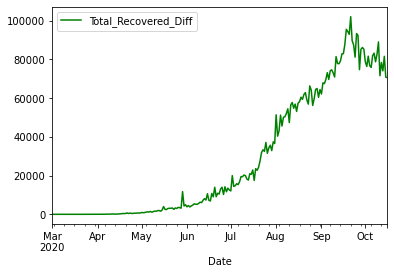

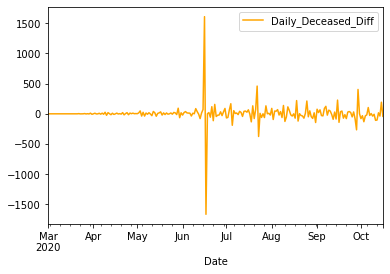

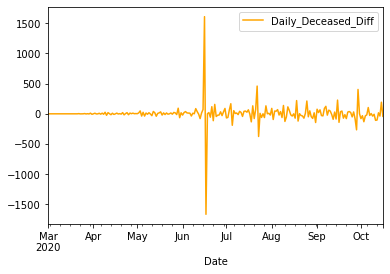

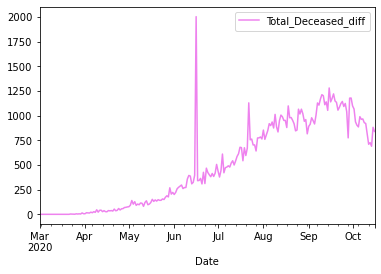

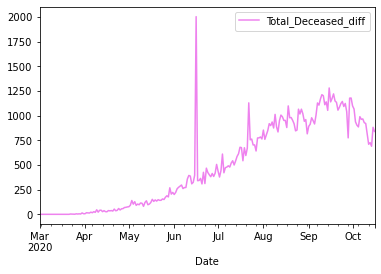

In [116]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dt_mrgd_diff.plot(x="Date",y=i,color=j)

In [117]:
dt_mrgd_diff

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
0,2020-03-01,0,3,0,3,0,0,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0,2,2,0,0,0,0
2,2020-03-03,1,6,0,3,0,0,-1,1,0,0,0,0
3,2020-03-04,22,28,0,3,0,0,21,22,0,0,0,0
4,2020-03-05,2,30,0,3,0,0,-20,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2020-10-12,54262,7173571,78365,6224767,710,109308,-13527,54262,6800,78365,-103,710
226,2020-10-13,63717,7237288,74079,6298846,727,110035,9455,63717,-4286,74079,17,727
227,2020-10-14,67811,7305099,81582,6380428,690,110725,4094,67811,7503,81582,-37,690
228,2020-10-15,63441,7368540,70792,6451220,882,111607,-4370,63441,-10790,70792,192,882


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
0,2020-03-01,0,3,0,3,0,0,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0,2,2,0,0,0,0
2,2020-03-03,1,6,0,3,0,0,-1,1,0,0,0,0
3,2020-03-04,22,28,0,3,0,0,21,22,0,0,0,0
4,2020-03-05,2,30,0,3,0,0,-20,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2020-10-12,54262,7173571,78365,6224767,710,109308,-13527,54262,6800,78365,-103,710
226,2020-10-13,63717,7237288,74079,6298846,727,110035,9455,63717,-4286,74079,17,727
227,2020-10-14,67811,7305099,81582,6380428,690,110725,4094,67811,7503,81582,-37,690
228,2020-10-15,63441,7368540,70792,6451220,882,111607,-4370,63441,-10790,70792,192,882


In [118]:
kys=["daily_cnf_diff_pos_neg","total_cnf_diff_pos_neg","daily_rcvd_diff_pos_neg","total_rcvd_diff_pos_neg","daily_dcsd_diff_pos_neg","total_dcsd_diff_pos_neg"]
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
pos_neg_dict={}
pos_neg_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dt_mrgd_diff[dt_mrgd_diff[j]>0]
    a.append(pos)
    b.append(len(pos))
    neg=dt_mrgd_diff[dt_mrgd_diff[j]<0]
    a.append(neg)
    b.append(len(neg))
    zro=dt_mrgd_diff[dt_mrgd_diff[j]==0]
    a.append(zro)
    b.append(len(zro))
    pos_neg_dict.update({i:a})
    pos_neg_len_dict.update({i:b})
    a=[]
    b=[]



In [119]:
dt_mrgd_ratio=dt_mrgd[22:].copy()
dt_mrgd_ratio.reset_index(inplace = True, drop = True)
dt_mrgd_ratio.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-23,94,497,2,25,2,9
1,2020-03-24,74,571,15,40,1,10
2,2020-03-25,86,657,3,43,1,11
3,2020-03-26,73,730,7,50,5,16
4,2020-03-27,153,883,25,75,3,19


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-23,94,497,2,25,2,9
1,2020-03-24,74,571,15,40,1,10
2,2020-03-25,86,657,3,43,1,11
3,2020-03-26,73,730,7,50,5,16
4,2020-03-27,153,883,25,75,3,19


In [120]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dt_mrgd_ratio.columns)
existing_cols.pop(0)
existing_cols
for i,j in zip(new_cols,existing_cols):
    dt_mrgd_ratio[i]=list(range(len(dt_mrgd_ratio)))
    dt_mrgd_ratio[i][0]=1
    tmp=[]
    tmp.append(dt_mrgd_ratio[i][0])
    for k in range(0,len(dt_mrgd_ratio)-1):
        tmp.append(round(dt_mrgd_ratio[j][k+1]/dt_mrgd_ratio[j][k],2))
    dt_mrgd_ratio[i]=tmp
dt_mrgd_ratio.head()
        

<ipython-input-120-cb91132e2a8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_ratio[i][0]=1
<ipython-input-120-cb91132e2a8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_ratio[i][0]=1


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-03-23,94,497,2,25,2,9,1.00,1.00,1.00,1.00,1.0,1.00
1,2020-03-24,74,571,15,40,1,10,0.79,1.15,7.50,1.60,0.5,1.11
2,2020-03-25,86,657,3,43,1,11,1.16,1.15,0.20,1.08,1.0,1.10
3,2020-03-26,73,730,7,50,5,16,0.85,1.11,2.33,1.16,5.0,1.45
4,2020-03-27,153,883,25,75,3,19,2.10,1.21,3.57,1.50,0.6,1.19


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-03-23,94,497,2,25,2,9,1.00,1.00,1.00,1.00,1.0,1.00
1,2020-03-24,74,571,15,40,1,10,0.79,1.15,7.50,1.60,0.5,1.11
2,2020-03-25,86,657,3,43,1,11,1.16,1.15,0.20,1.08,1.0,1.10
3,2020-03-26,73,730,7,50,5,16,0.85,1.11,2.33,1.16,5.0,1.45
4,2020-03-27,153,883,25,75,3,19,2.10,1.21,3.57,1.50,0.6,1.19


In [121]:
round(dt_mrgd_ratio["Total Confirmed"][4]/dt_mrgd_ratio["Total Confirmed"][3],2)==dt_mrgd_ratio["Total_Confirmed_Ratio"][4]

True

True

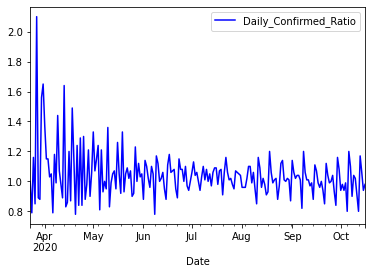

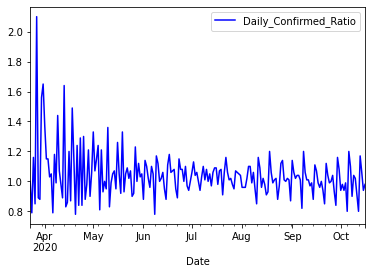

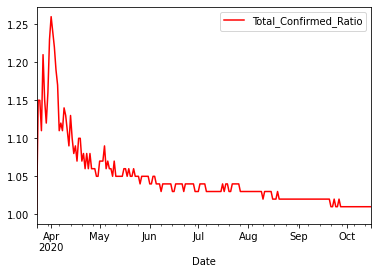

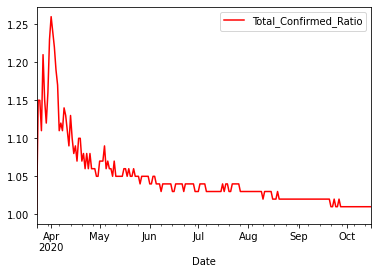

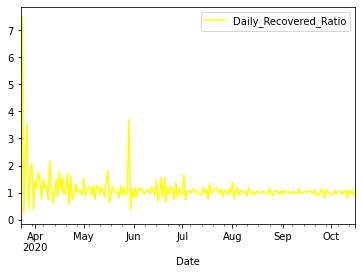

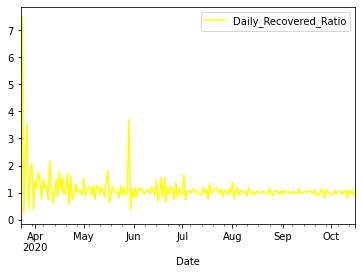

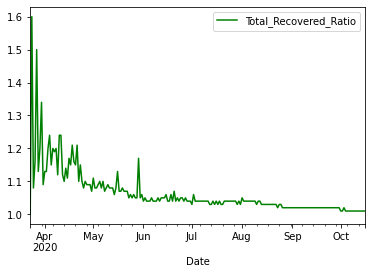

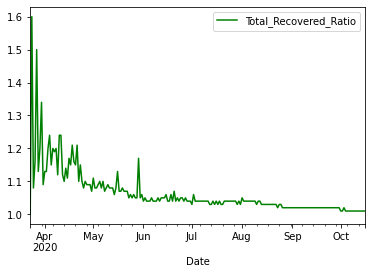

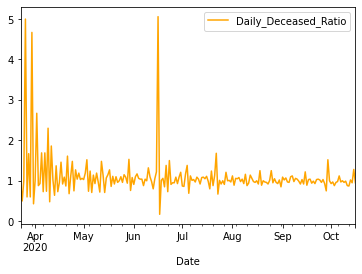

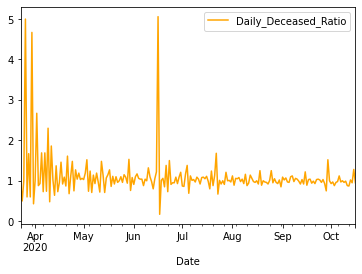

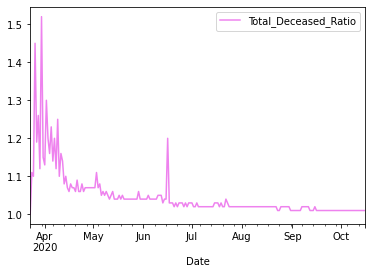

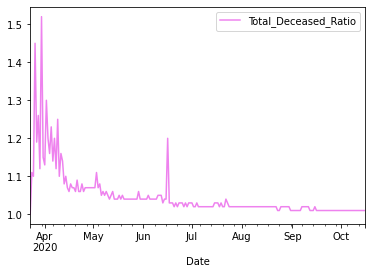

In [122]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dt_mrgd_ratio.plot(x="Date",y=i,color=j)

In [123]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dt_mrgd_ratio.columns)
existing_cols.pop(0)
existing_cols
for i,j in zip(new_cols,existing_cols):
    dt_mrgd_ratio[i]=list(range(len(dt_mrgd_ratio)))
    dt_mrgd_ratio[i][0]=1
    tmp=[]
    tmp.append(dt_mrgd_ratio[i][0])
    for k in range(0,len(dt_mrgd_ratio)-1):
        tmp.append(dt_mrgd_ratio[j][k+1]/dt_mrgd_ratio[j][k])
    dt_mrgd_ratio[i]=tmp
dt_mrgd_ratio.head()
        

<ipython-input-123-ba3f6f7cd61a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_ratio[i][0]=1


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-03-23,94,497,2,25,2,9,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
1,2020-03-24,74,571,15,40,1,10,0.787234,1.148893,7.500000,1.600000,0.5,1.111111
2,2020-03-25,86,657,3,43,1,11,1.162162,1.150613,0.200000,1.075000,1.0,1.100000
3,2020-03-26,73,730,7,50,5,16,0.848837,1.111111,2.333333,1.162791,5.0,1.454545
4,2020-03-27,153,883,25,75,3,19,2.095890,1.209589,3.571429,1.500000,0.6,1.187500


<ipython-input-123-ba3f6f7cd61a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_ratio[i][0]=1


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-03-23,94,497,2,25,2,9,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
1,2020-03-24,74,571,15,40,1,10,0.787234,1.148893,7.500000,1.600000,0.5,1.111111
2,2020-03-25,86,657,3,43,1,11,1.162162,1.150613,0.200000,1.075000,1.0,1.100000
3,2020-03-26,73,730,7,50,5,16,0.848837,1.111111,2.333333,1.162791,5.0,1.454545
4,2020-03-27,153,883,25,75,3,19,2.095890,1.209589,3.571429,1.500000,0.6,1.187500


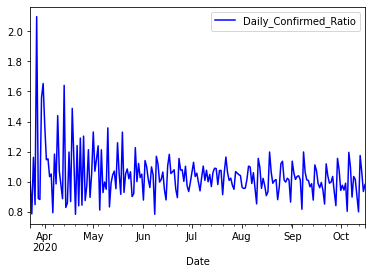

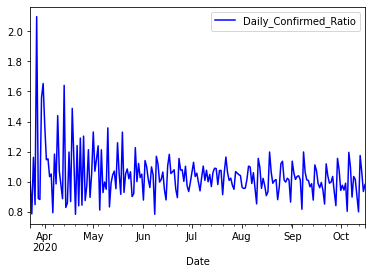

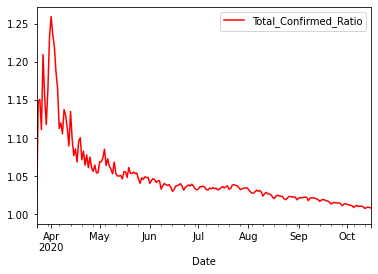

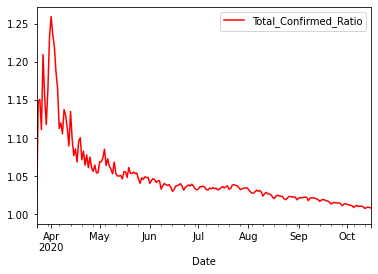

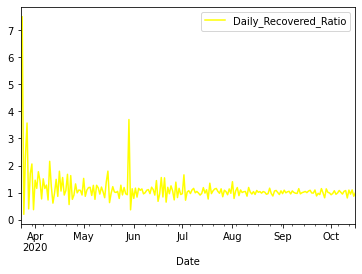

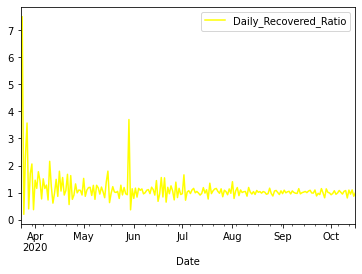

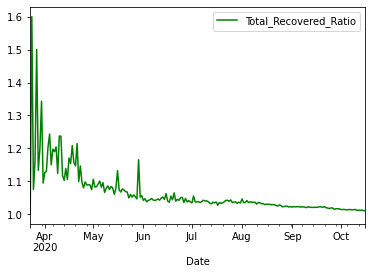

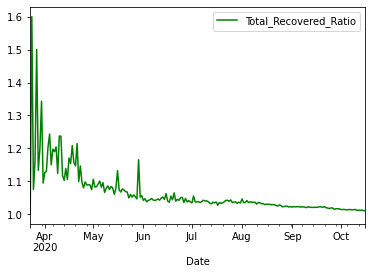

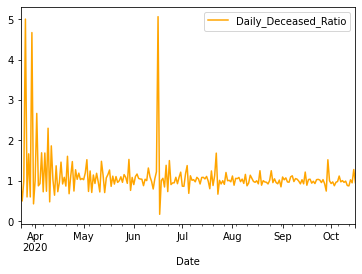

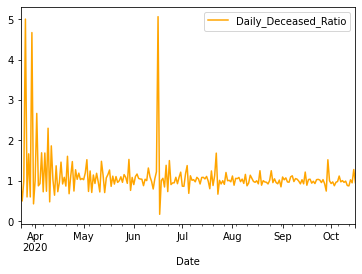

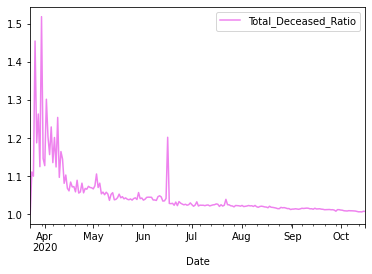

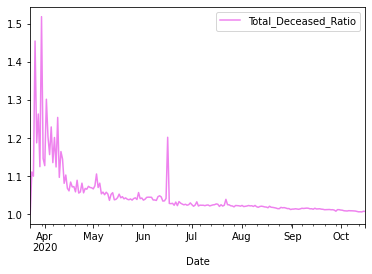

In [124]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dt_mrgd_ratio.plot(x="Date",y=i,color=j)

In [125]:
kys=["daily_cnf_diff_rat10","total_cnf_diff_rat10","daily_rcvd_diff_rat10","total_rcvd_diff_rat10","daily_dcsd_diff_rat10","total_dcsd_diff_rat10"]
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
one_zro_dict={}
one_zro_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dt_mrgd_ratio[dt_mrgd_ratio[j]>=1]
    a.append(pos)
    b.append(len(pos))
    neg=dt_mrgd_ratio[dt_mrgd_ratio[j]<1]
    a.append(neg)
    b.append(len(neg))
    zro=dt_mrgd_ratio[dt_mrgd_ratio[j]==0]
    a.append(zro)
    b.append(len(zro))
    one_zro_dict.update({i:a})
    one_zro_len_dict.update({i:b})
    a=[]
    b=[]





In [126]:
datamr.reset_index(inplace = True, drop = True)
datamr.head()

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,31,2020-03-01,0,3,0,3,0,0
1,32,2020-03-02,2,5,0,3,0,0
2,33,2020-03-03,1,6,0,3,0,0
3,34,2020-03-04,22,28,0,3,0,0
4,35,2020-03-05,2,30,0,3,0,0


,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,31,2020-03-01,0,3,0,3,0,0
1,32,2020-03-02,2,5,0,3,0,0
2,33,2020-03-03,1,6,0,3,0,0
3,34,2020-03-04,22,28,0,3,0,0
4,35,2020-03-05,2,30,0,3,0,0


In [127]:
dataap.reset_index(inplace = True, drop = True)
dataap.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-04-01,424,2059,19,169,6,53
1,2020-04-02,486,2545,22,191,16,69
2,2020-04-03,560,3105,39,230,14,83
3,2020-04-04,579,3684,56,286,13,96
4,2020-04-05,609,4293,43,329,22,118


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-04-01,424,2059,19,169,6,53
1,2020-04-02,486,2545,22,191,16,69
2,2020-04-03,560,3105,39,230,14,83
3,2020-04-04,579,3684,56,286,13,96
4,2020-04-05,609,4293,43,329,22,118


In [128]:
datamy.reset_index(inplace = True, drop = True)
datamy.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-05-01,2396,37262,962,10021,77,1231
1,2020-05-02,2564,39826,831,10852,92,1323
2,2020-05-03,2952,42778,911,11763,140,1463
3,2020-05-04,3656,46434,1082,12845,103,1566
4,2020-05-05,2971,49405,1295,14140,128,1694


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-05-01,2396,37262,962,10021,77,1231
1,2020-05-02,2564,39826,831,10852,92,1323
2,2020-05-03,2952,42778,911,11763,140,1463
3,2020-05-04,3656,46434,1082,12845,103,1566
4,2020-05-05,2971,49405,1295,14140,128,1694


In [129]:
datajn.reset_index(inplace = True, drop = True)
datajn.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-06-01,7723,198372,3882,95744,201,5607
1,2020-06-02,8812,207187,4531,100275,222,5829
2,2020-06-03,9689,216876,3789,104064,259,6088
3,2020-06-04,9847,226723,4390,108454,274,6362
4,2020-06-05,9472,236195,4770,113224,286,6648


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-06-01,7723,198372,3882,95744,201,5607
1,2020-06-02,8812,207187,4531,100275,222,5829
2,2020-06-03,9689,216876,3789,104064,259,6088
3,2020-06-04,9847,226723,4390,108454,274,6362
4,2020-06-05,9472,236195,4770,113224,286,6648


In [130]:
tc_mean_list=[]
tr_mean_list=[]
td_mean_list=[]

In [131]:
tc_mean_list.append(datamr["Total Confirmed"][len(datamr)-1]/len(datamr))
tc_mean_list.append(dataap["Total Confirmed"][len(dataap)-1]/len(dataap))
tc_mean_list.append(datamy["Total Confirmed"][len(datamy)-1]/len(datamy))
tc_mean_list.append(datajn["Total Confirmed"][len(datajn)-1]/len(datajn))
tc_mean_list.append(datajly["Total Confirmed"][len(datajly)-1]/len(datajly))
tc_mean_list.append(dataaug["Total Confirmed"][len(dataaug)-1]/len(dataaug))
tc_mean_list.append(dataspt["Total Confirmed"][len(dataspt)-1]/len(dataspt))



tr_mean_list.append(datamr["Total Recovered"][len(datamr)-1]/len(datamr))
tr_mean_list.append(dataap["Total Recovered"][len(dataap)-1]/len(dataap))
tr_mean_list.append(datamy["Total Recovered"][len(datamy)-1]/len(datamy))
tr_mean_list.append(datajn["Total Recovered"][len(datajn)-1]/len(datajn))
tr_mean_list.append(datajly["Total Recovered"][len(datajly)-1]/len(datajly))
tr_mean_list.append(dataaug["Total Recovered"][len(dataaug)-1]/len(dataaug))
tr_mean_list.append(dataspt["Total Recovered"][len(dataspt)-1]/len(dataspt))


td_mean_list.append(datamr["Total Deceased"][len(datamr)-1]/len(datamr))
td_mean_list.append(dataap["Total Deceased"][len(dataap)-1]/len(dataap))
td_mean_list.append(datamy["Total Deceased"][len(datamy)-1]/len(datamy))
td_mean_list.append(datajn["Total Deceased"][len(datajn)-1]/len(datajn))
td_mean_list.append(datajly["Total Deceased"][len(datajly)-1]/len(datajly))
td_mean_list.append(dataaug["Total Deceased"][len(dataaug)-1]/len(dataaug))
td_mean_list.append(dataspt["Total Deceased"][len(dataspt)-1]/len(dataspt))


In [132]:
mean_data={"month":["March","April","May","June","July","August","September"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31","2020-09-30"],"tc_mean":tc_mean_list,"tr_mean":tr_mean_list,"td_mean":td_mean_list}

In [133]:
tmean_dataf=pd.DataFrame(mean_data)
tmean_dataf['month_end'] = tmean_dataf['month_end'].astype('datetime64[ns]') 
tmean_dataf

,month,month_end,tc_mean,tr_mean,td_mean
0,March,2020-03-31,52.741935,4.838710,1.516129
1,April,2020-04-30,1162.200000,301.966667,38.466667
2,May,2020-05-31,6149.967742,2963.290323,174.387097
3,June,2020-06-30,19526.500000,11594.666667,580.366667
4,July,2020-07-31,54735.290323,35339.935484,1179.548387
5,August,2020-08-31,118966.225806,91528.064516,2111.129032
6,September,2020-09-30,210342.500000,175666.300000,3270.733333


,month,month_end,tc_mean,tr_mean,td_mean
0,March,2020-03-31,52.741935,4.838710,1.516129
1,April,2020-04-30,1162.200000,301.966667,38.466667
2,May,2020-05-31,6149.967742,2963.290323,174.387097
3,June,2020-06-30,19526.500000,11594.666667,580.366667
4,July,2020-07-31,54735.290323,35339.935484,1179.548387
5,August,2020-08-31,118966.225806,91528.064516,2111.129032
6,September,2020-09-30,210342.500000,175666.300000,3270.733333


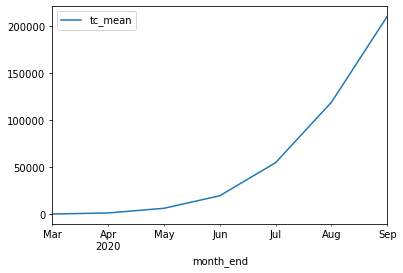

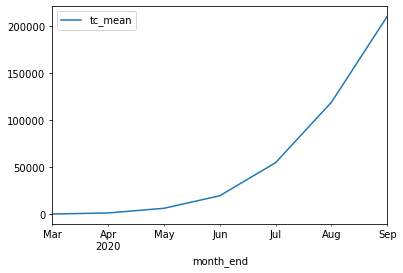

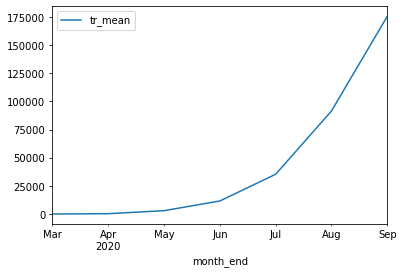

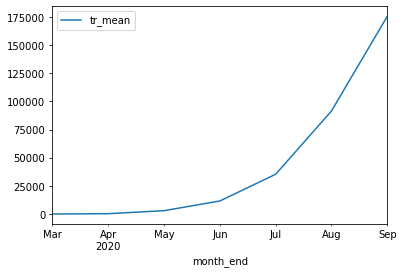

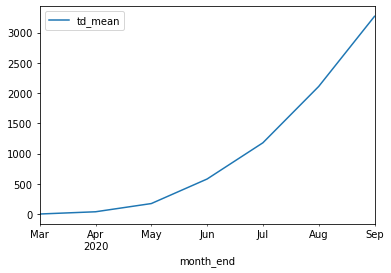

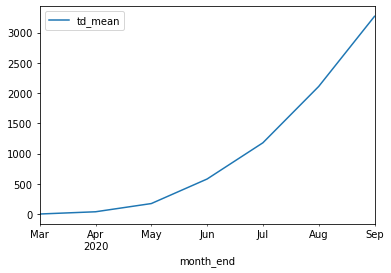

In [134]:
colls=list(tmean_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    tmean_dataf.plot(x="month_end",y=i)

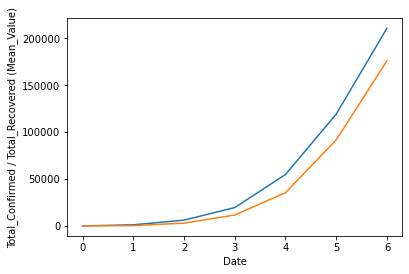

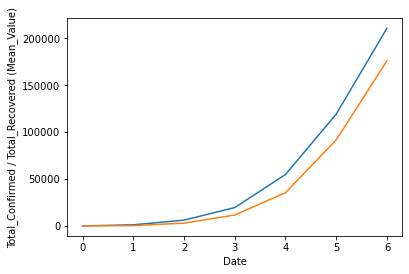

In [135]:
fig,ax=plt.subplots()
ax.plot(list(tmean_dataf.index)[:len(list(tmean_dataf.index))], tmean_dataf['tc_mean'][:len(tmean_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Total_Confirmed / Total_Recovered (Mean_Value)")
ax.plot(list(tmean_dataf.index)[:len(list(tmean_dataf.index))], tmean_dataf['tr_mean'][:len(tmean_dataf)])
plt.show()

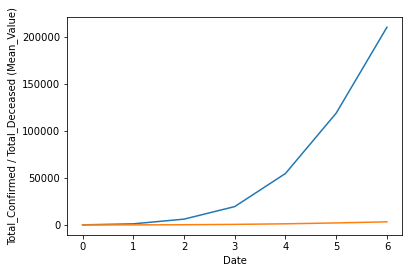

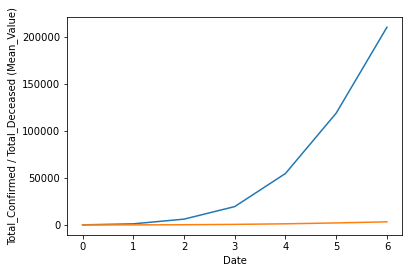

In [136]:
fig,ax=plt.subplots()
ax.plot(list(tmean_dataf.index)[:len(list(tmean_dataf.index))], tmean_dataf['tc_mean'][:len(tmean_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Total_Confirmed / Total_Deceased (Mean_Value)")
ax.plot(list(tmean_dataf.index)[:len(list(tmean_dataf.index))], tmean_dataf['td_mean'][:len(tmean_dataf)])
plt.show()

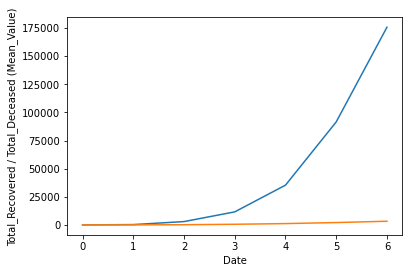

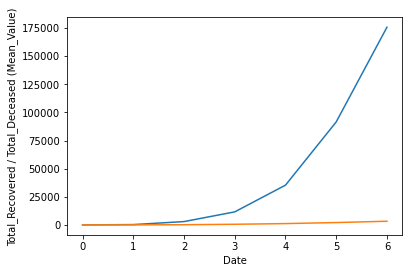

In [137]:
fig,ax=plt.subplots()
ax.plot(list(tmean_dataf.index)[:len(list(tmean_dataf.index))], tmean_dataf['tr_mean'][:len(tmean_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Total_Recovered / Total_Deceased (Mean_Value)")
ax.plot(list(tmean_dataf.index)[:len(list(tmean_dataf.index))], tmean_dataf['td_mean'][:len(tmean_dataf)])
plt.show()

In [138]:
dc_mean_list=[]
dr_mean_list=[]
dd_mean_list=[]

In [139]:
dc_mean_list.append(np.sum(datamr["Daily Confirmed"])/len(datamr))
dc_mean_list.append(np.sum(dataap["Daily Confirmed"])/len(dataap))
dc_mean_list.append(np.sum(datamy["Daily Confirmed"])/len(datamy))
dc_mean_list.append(np.sum(datajn["Daily Confirmed"])/len(datajn))
dc_mean_list.append(np.sum(datajly["Daily Confirmed"])/len(datajly))
dc_mean_list.append(np.sum(dataaug["Daily Confirmed"])/len(dataaug))
dc_mean_list.append(np.sum(dataspt["Daily Confirmed"])/len(dataspt))

dr_mean_list.append(np.sum(datamr["Daily Recovered"])/len(datamr))
dr_mean_list.append(np.sum(dataap["Daily Recovered"])/len(dataap))
dr_mean_list.append(np.sum(datamy["Daily Recovered"])/len(datamy))
dr_mean_list.append(np.sum(datajn["Daily Recovered"])/len(datajn))
dr_mean_list.append(np.sum(datajly["Daily Recovered"])/len(datajly))
dr_mean_list.append(np.sum(dataaug["Daily Recovered"])/len(dataaug))
dr_mean_list.append(np.sum(dataspt["Daily Recovered"])/len(dataspt))


dd_mean_list.append(np.sum(datamr["Daily Deceased"])/len(datamr))
dd_mean_list.append(np.sum(dataap["Daily Deceased"])/len(dataap))
dd_mean_list.append(np.sum(datamy["Daily Deceased"])/len(datamy))
dd_mean_list.append(np.sum(datajn["Daily Deceased"])/len(datajn))
dd_mean_list.append(np.sum(datajly["Daily Deceased"])/len(datajly))
dd_mean_list.append(np.sum(dataaug["Daily Deceased"])/len(dataaug))
dd_mean_list.append(np.sum(dataspt["Daily Deceased"])/len(dataspt))


In [140]:
dmean_data={"month":["March","April","May","June","July","August","September"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31","2020-09-30"],"dc_mean":dc_mean_list,"dr_mean":dr_mean_list,"dd_mean":dd_mean_list}

In [141]:
dmean_dataf=pd.DataFrame(dmean_data)
dmean_dataf['month_end'] = dmean_dataf['month_end'].astype('datetime64[ns]') 
dmean_dataf

,month,month_end,dc_mean,dr_mean,dd_mean
0,March,2020-03-31,52.645161,4.741935,1.516129
1,April,2020-04-30,1107.700000,296.966667,36.900000
2,May,2020-05-31,5025.258065,2671.064516,137.161290
3,June,2020-06-30,13171.533333,8532.600000,400.166667
4,July,2020-07-31,35838.677419,24119.290323,617.903226
5,August,2020-08-31,64222.096774,56188.129032,931.580645
6,September,2020-09-30,87410.733333,81087.300000,1089.233333


,month,month_end,dc_mean,dr_mean,dd_mean
0,March,2020-03-31,52.645161,4.741935,1.516129
1,April,2020-04-30,1107.700000,296.966667,36.900000
2,May,2020-05-31,5025.258065,2671.064516,137.161290
3,June,2020-06-30,13171.533333,8532.600000,400.166667
4,July,2020-07-31,35838.677419,24119.290323,617.903226
5,August,2020-08-31,64222.096774,56188.129032,931.580645
6,September,2020-09-30,87410.733333,81087.300000,1089.233333


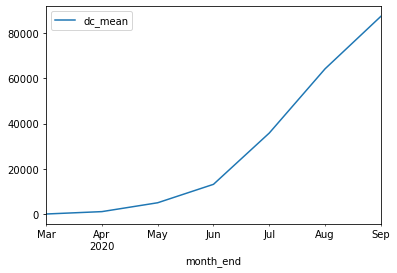

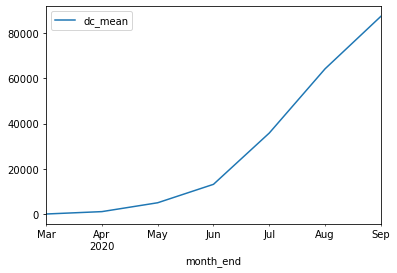

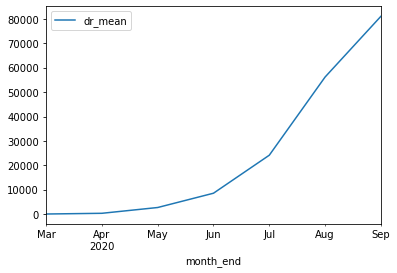

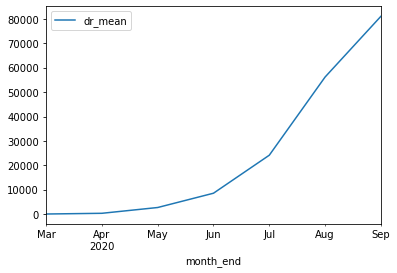

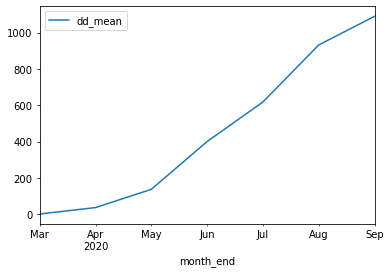

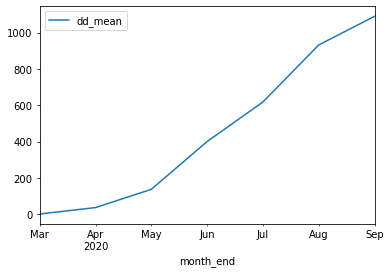

In [142]:
colls=list(dmean_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    dmean_dataf.plot(x="month_end",y=i)

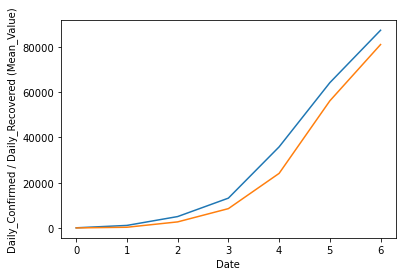

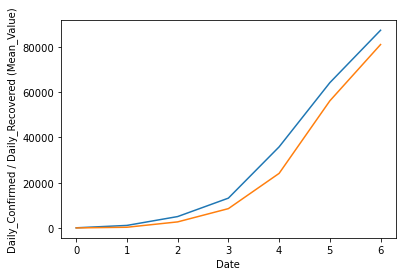

In [143]:
fig,ax=plt.subplots()
ax.plot(list(dmean_dataf.index)[:len(list(dmean_dataf.index))], dmean_dataf['dc_mean'][:len(dmean_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Daily_Confirmed / Daily_Recovered (Mean_Value)")
ax.plot(list(dmean_dataf.index)[:len(list(dmean_dataf.index))], dmean_dataf['dr_mean'][:len(dmean_dataf)])
plt.show()

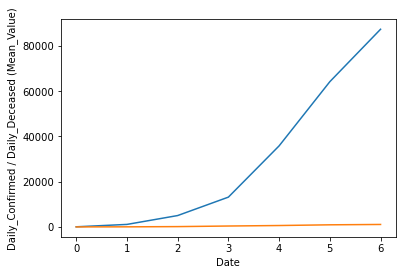

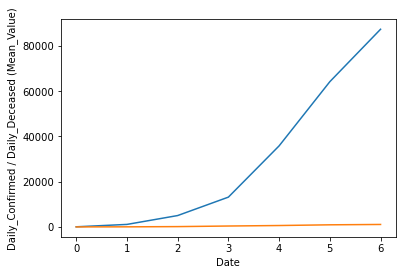

In [144]:
fig,ax=plt.subplots()
ax.plot(list(dmean_dataf.index)[:len(list(dmean_dataf.index))], dmean_dataf['dc_mean'][:len(dmean_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Daily_Confirmed / Daily_Deceased (Mean_Value)")
ax.plot(list(dmean_dataf.index)[:len(list(dmean_dataf.index))], dmean_dataf['dd_mean'][:len(dmean_dataf)])
plt.show()

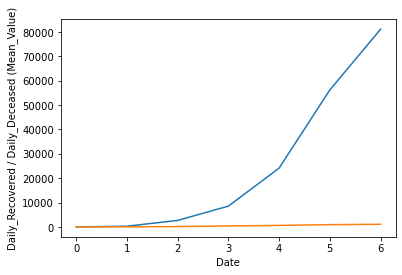

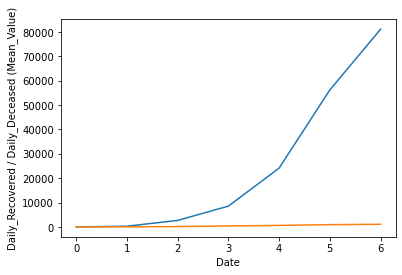

In [145]:
fig,ax=plt.subplots()
ax.plot(list(dmean_dataf.index)[:len(list(dmean_dataf.index))], dmean_dataf['dr_mean'][:len(dmean_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Daily_Recovered / Daily_Deceased (Mean_Value)")
ax.plot(list(dmean_dataf.index)[:len(list(dmean_dataf.index))], dmean_dataf['dd_mean'][:len(dmean_dataf)])
plt.show()

In [146]:
list(dmean_dataf.index)

[0, 1, 2, 3, 4, 5, 6]

[0, 1, 2, 3, 4, 5, 6]

In [147]:
tc_diff_list=[]
tr_diff_list=[]
td_diff_list=[]

In [148]:
tc_diff_list.append(datamr["Total Confirmed"][len(datamr)-1]-datamr["Total Confirmed"][0])
tc_diff_list.append(dataap["Total Confirmed"][len(dataap)-1]-dataap["Total Confirmed"][0])
tc_diff_list.append(datamy["Total Confirmed"][len(datamy)-1]-datamy["Total Confirmed"][0])
tc_diff_list.append(datajn["Total Confirmed"][len(datajn)-1]-datajn["Total Confirmed"][0])
tc_diff_list.append(datajly["Total Confirmed"][len(datajly)-1]-datajly["Total Confirmed"][0])
tc_diff_list.append(dataaug["Total Confirmed"][len(dataaug)-1]-dataaug["Total Confirmed"][0])
tc_diff_list.append(dataspt["Total Confirmed"][len(dataspt)-1]-dataspt["Total Confirmed"][0])

tr_diff_list.append(datamr["Total Recovered"][len(datamr)-1]-datamr["Total Recovered"][0])
tr_diff_list.append(dataap["Total Recovered"][len(dataap)-1]-dataap["Total Recovered"][0])
tr_diff_list.append(datamy["Total Recovered"][len(datamy)-1]-datamy["Total Recovered"][0])
tr_diff_list.append(datajn["Total Recovered"][len(datajn)-1]-datajn["Total Recovered"][0])
tr_diff_list.append(datajly["Total Recovered"][len(datajly)-1]-datajly["Total Recovered"][0])
tr_diff_list.append(dataaug["Total Recovered"][len(dataaug)-1]-dataaug["Total Recovered"][0])
tr_diff_list.append(dataspt["Total Recovered"][len(dataspt)-1]-dataspt["Total Recovered"][0])

td_diff_list.append(datamr["Total Deceased"][len(datamr)-1]-datamr["Total Deceased"][0])
td_diff_list.append(dataap["Total Deceased"][len(dataap)-1]-dataap["Total Deceased"][0])
td_diff_list.append(datamy["Total Deceased"][len(datamy)-1]-datamy["Total Deceased"][0])
td_diff_list.append(datajn["Total Deceased"][len(datajn)-1]-datajn["Total Deceased"][0])
td_diff_list.append(datajly["Total Deceased"][len(datajly)-1]-datajly["Total Deceased"][0])
td_diff_list.append(dataaug["Total Deceased"][len(dataaug)-1]-dataaug["Total Deceased"][0])
td_diff_list.append(dataspt["Total Deceased"][len(dataspt)-1]-dataspt["Total Deceased"][0])


In [149]:
tdiff_data={"month":["March","April","May","June","July","August","September"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31","2020-09-30"],"tc_diff":tc_diff_list,"tr_diff":tr_diff_list,"td_diff":td_diff_list}

In [150]:
tdiff_dataf=pd.DataFrame(tdiff_data)
tdiff_dataf['month_end'] = tdiff_dataf['month_end'].astype('datetime64[ns]') 
tdiff_dataf

,month,month_end,tc_diff,tr_diff,td_diff
0,March,2020-03-31,1632,147,47
1,April,2020-04-30,32807,8890,1101
2,May,2020-05-31,153387,81841,4175
3,June,2020-06-30,387423,252096,11804
4,July,2020-07-31,1091570,735634,18717
5,August,2020-08-31,1935768,1690464,28025
6,September,2020-09-30,2544154,2370474,31785


,month,month_end,tc_diff,tr_diff,td_diff
0,March,2020-03-31,1632,147,47
1,April,2020-04-30,32807,8890,1101
2,May,2020-05-31,153387,81841,4175
3,June,2020-06-30,387423,252096,11804
4,July,2020-07-31,1091570,735634,18717
5,August,2020-08-31,1935768,1690464,28025
6,September,2020-09-30,2544154,2370474,31785


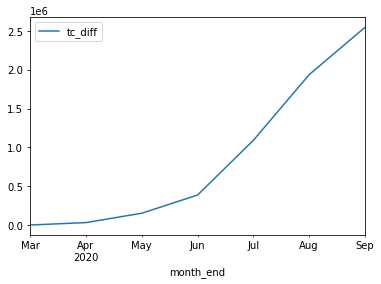

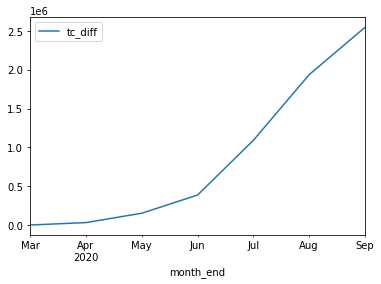

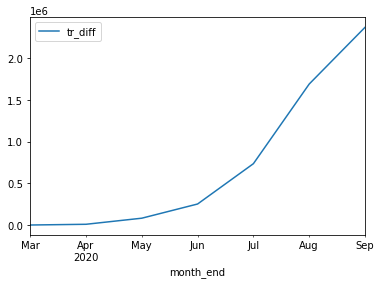

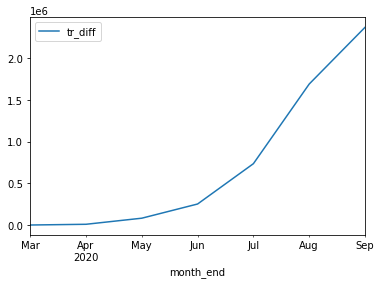

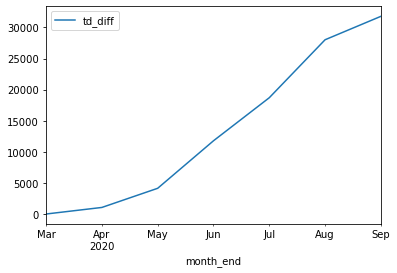

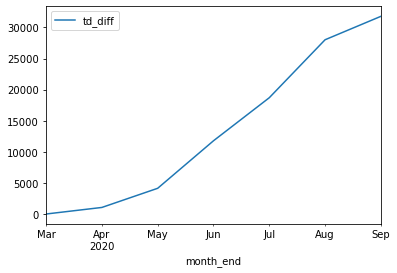

In [151]:
colls=list(tdiff_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    tdiff_dataf.plot(x="month_end",y=i)

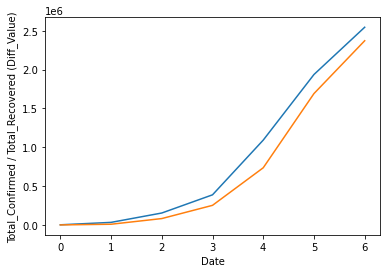

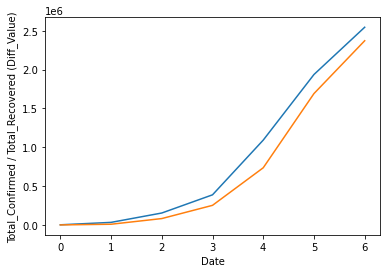

In [152]:
fig,ax=plt.subplots()
ax.plot(list(tdiff_dataf.index)[:len(list(tdiff_dataf.index))], tdiff_dataf['tc_diff'][:len(tdiff_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Total_Confirmed / Total_Recovered (Diff_Value)")
ax.plot(list(tdiff_dataf.index)[:len(list(tdiff_dataf.index))], tdiff_dataf['tr_diff'][:len(tdiff_dataf)])
plt.show()

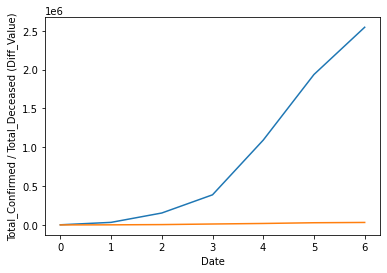

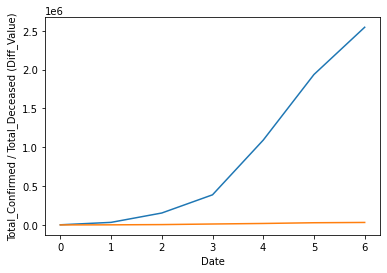

In [153]:
fig,ax=plt.subplots()
ax.plot(list(tdiff_dataf.index)[:len(list(tdiff_dataf.index))], tdiff_dataf['tc_diff'][:len(tdiff_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Total_Confirmed / Total_Deceased (Diff_Value)")
ax.plot(list(tdiff_dataf.index)[:len(list(tdiff_dataf.index))], tdiff_dataf['td_diff'][:len(tdiff_dataf)])
plt.show()

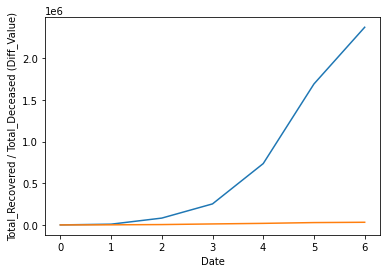

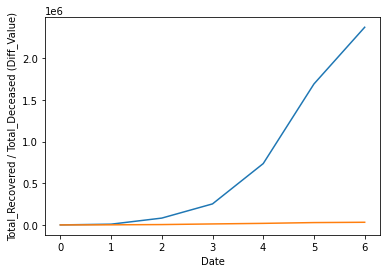

In [154]:
fig,ax=plt.subplots()
ax.plot(list(tdiff_dataf.index)[:len(list(tdiff_dataf.index))], tdiff_dataf['tr_diff'][:len(tdiff_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Total_Recovered / Total_Deceased (Diff_Value)")
ax.plot(list(tdiff_dataf.index)[:len(list(tdiff_dataf.index))], tdiff_dataf['td_diff'][:len(tdiff_dataf)])
plt.show()

In [155]:
dc_diff_list=[]
dr_diff_list=[]
dd_diff_list=[]

In [156]:
dc_diff_list.append(datamr["Daily Confirmed"][len(datamr)-1]-datamr["Daily Confirmed"][0])
dc_diff_list.append(dataap["Daily Confirmed"][len(dataap)-1]-dataap["Daily Confirmed"][0])
dc_diff_list.append(datamy["Daily Confirmed"][len(datamy)-1]-datamy["Daily Confirmed"][0])
dc_diff_list.append(datajn["Daily Confirmed"][len(datajn)-1]-datajn["Daily Confirmed"][0])
dc_diff_list.append(datajly["Daily Confirmed"][len(datajly)-1]-datajly["Daily Confirmed"][0])
dc_diff_list.append(dataaug["Daily Confirmed"][len(dataaug)-1]-dataaug["Daily Confirmed"][0])
dc_diff_list.append(dataspt["Daily Confirmed"][len(dataspt)-1]-dataspt["Daily Confirmed"][0])

dr_diff_list.append(datamr["Daily Recovered"][len(datamr)-1]-datamr["Daily Recovered"][0])
dr_diff_list.append(dataap["Daily Recovered"][len(dataap)-1]-dataap["Daily Recovered"][0])
dr_diff_list.append(datamy["Daily Recovered"][len(datamy)-1]-datamy["Daily Recovered"][0])
dr_diff_list.append(datajn["Daily Recovered"][len(datajn)-1]-datajn["Daily Recovered"][0])
dr_diff_list.append(datajly["Daily Recovered"][len(datajly)-1]-datajly["Daily Recovered"][0])
dr_diff_list.append(dataaug["Daily Recovered"][len(dataaug)-1]-dataaug["Daily Recovered"][0])
dr_diff_list.append(dataspt["Daily Recovered"][len(dataspt)-1]-dataspt["Daily Recovered"][0])

dd_diff_list.append(datamr["Daily Deceased"][len(datamr)-1]-datamr["Daily Deceased"][0])
dd_diff_list.append(dataap["Daily Deceased"][len(dataap)-1]-dataap["Daily Deceased"][0])
dd_diff_list.append(datamy["Daily Deceased"][len(datamy)-1]-datamy["Daily Deceased"][0])
dd_diff_list.append(datajn["Daily Deceased"][len(datajn)-1]-datajn["Daily Deceased"][0])
dd_diff_list.append(datajly["Daily Deceased"][len(datajly)-1]-datajly["Daily Deceased"][0])
dd_diff_list.append(dataaug["Daily Deceased"][len(dataaug)-1]-dataaug["Daily Deceased"][0])
dd_diff_list.append(dataspt["Daily Deceased"][len(dataspt)-1]-dataspt["Daily Deceased"][0])


In [157]:
ddiff_data={"month":["March","April","May","June","July","August","September"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31","2020-09-30"],"dc_diff":dc_diff_list,"dr_diff":dr_diff_list,"dd_diff":dd_diff_list}

In [158]:
ddiff_dataf=pd.DataFrame(ddiff_data)
ddiff_dataf['month_end'] = ddiff_dataf['month_end'].astype('datetime64[ns]') 
ddiff_dataf

,month,month_end,dc_diff,dr_diff,dd_diff
0,March,2020-03-31,309,13,6
1,April,2020-04-30,1377,611,69
2,May,2020-05-31,6393,3966,145
3,June,2020-06-30,10533,8683,305
4,July,2020-07-31,37783,24490,326
5,August,2020-08-31,13649,13067,-38
6,September,2020-09-30,8580,23129,287


,month,month_end,dc_diff,dr_diff,dd_diff
0,March,2020-03-31,309,13,6
1,April,2020-04-30,1377,611,69
2,May,2020-05-31,6393,3966,145
3,June,2020-06-30,10533,8683,305
4,July,2020-07-31,37783,24490,326
5,August,2020-08-31,13649,13067,-38
6,September,2020-09-30,8580,23129,287


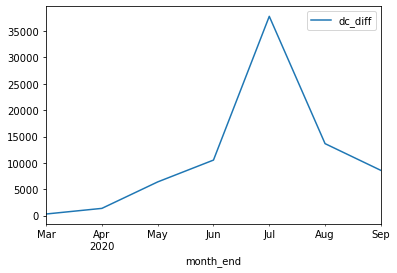

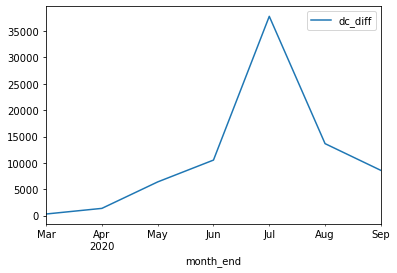

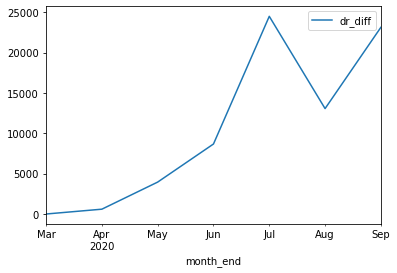

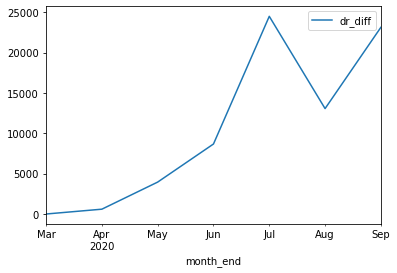

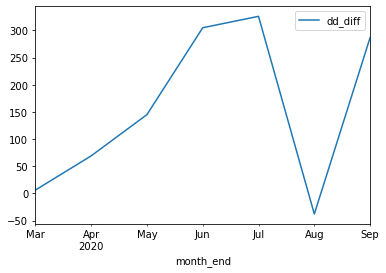

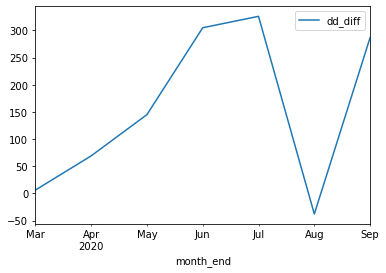

In [159]:
colls=list(ddiff_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    ddiff_dataf.plot(x="month_end",y=i)

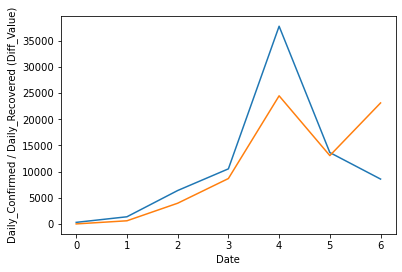

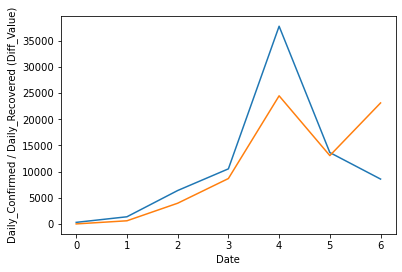

In [160]:
fig,ax=plt.subplots()
ax.plot(list(ddiff_dataf.index)[:len(list(ddiff_dataf.index))], ddiff_dataf['dc_diff'][:len(ddiff_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Daily_Confirmed / Daily_Recovered (Diff_Value)")
ax.plot(list(ddiff_dataf.index)[:len(list(ddiff_dataf.index))], ddiff_dataf['dr_diff'][:len(ddiff_dataf)])
plt.show()

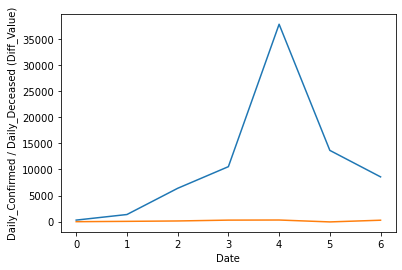

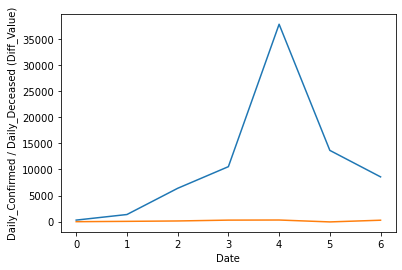

In [161]:
fig,ax=plt.subplots()
ax.plot(list(ddiff_dataf.index)[:len(list(ddiff_dataf.index))], ddiff_dataf['dc_diff'][:len(ddiff_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Daily_Confirmed / Daily_Deceased (Diff_Value)")
ax.plot(list(ddiff_dataf.index)[:len(list(ddiff_dataf.index))], ddiff_dataf['dd_diff'][:len(ddiff_dataf)])
plt.show()

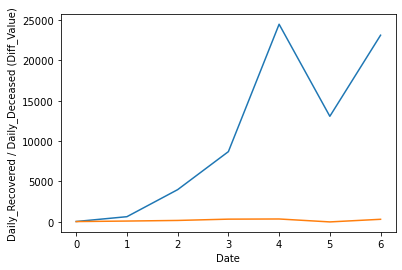

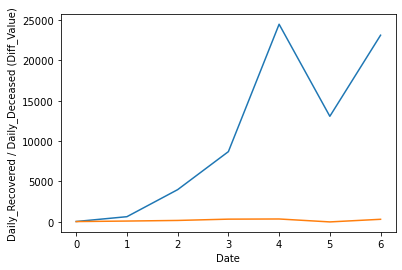

In [162]:
fig,ax=plt.subplots()
ax.plot(list(ddiff_dataf.index)[:len(list(ddiff_dataf.index))], ddiff_dataf['dr_diff'][:len(ddiff_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Daily_Recovered / Daily_Deceased (Diff_Value)")
ax.plot(list(ddiff_dataf.index)[:len(list(ddiff_dataf.index))], ddiff_dataf['dd_diff'][:len(ddiff_dataf)])
plt.show()

In [163]:
dc_diff_list_min_max=[]
dr_diff_list_min_max=[]
dd_diff_list_min_max=[]

In [164]:
dc_diff_list_min_max.append(max(datamr["Daily Confirmed"])-min(datamr["Daily Confirmed"]))
dc_diff_list_min_max.append(max(dataap["Daily Confirmed"])-min(dataap["Daily Confirmed"]))
dc_diff_list_min_max.append(max(datamy["Daily Confirmed"])-min(datamy["Daily Confirmed"]))
dc_diff_list_min_max.append(max(datajn["Daily Confirmed"])-min(datajn["Daily Confirmed"]))
dc_diff_list_min_max.append(max(datajly["Daily Confirmed"])-min(datajly["Daily Confirmed"]))
dc_diff_list_min_max.append(max(dataaug["Daily Confirmed"])-min(dataaug["Daily Confirmed"]))
dc_diff_list_min_max.append(max(dataspt["Daily Confirmed"])-min(dataspt["Daily Confirmed"]))

dr_diff_list_min_max.append(max(datamr["Daily Recovered"])-min(datamr["Daily Recovered"]))
dr_diff_list_min_max.append(max(dataap["Daily Recovered"])-min(dataap["Daily Recovered"]))
dr_diff_list_min_max.append(max(datamy["Daily Recovered"])-min(datamy["Daily Recovered"]))
dr_diff_list_min_max.append(max(datajn["Daily Recovered"])-min(datajn["Daily Recovered"]))
dr_diff_list_min_max.append(max(datajly["Daily Recovered"])-min(datajly["Daily Recovered"]))
dr_diff_list_min_max.append(max(dataaug["Daily Recovered"])-min(dataaug["Daily Recovered"]))
dr_diff_list_min_max.append(max(dataspt["Daily Recovered"])-min(dataspt["Daily Recovered"]))

dd_diff_list_min_max.append(max(datamr["Daily Deceased"])-min(datamr["Daily Deceased"]))
dd_diff_list_min_max.append(max(dataap["Daily Deceased"])-min(dataap["Daily Deceased"]))
dd_diff_list_min_max.append(max(datamy["Daily Deceased"])-min(datamy["Daily Deceased"]))
dd_diff_list_min_max.append(max(datajn["Daily Deceased"])-min(datajn["Daily Deceased"]))
dd_diff_list_min_max.append(max(datajly["Daily Deceased"])-min(datajly["Daily Deceased"]))
dd_diff_list_min_max.append(max(dataaug["Daily Deceased"])-min(dataaug["Daily Deceased"]))
dd_diff_list_min_max.append(max(dataspt["Daily Deceased"])-min(dataspt["Daily Deceased"]))


In [165]:
ddiff_data={"month":["March","April","May","June","July","August","September"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31","2020-09-30"],"dc_diff":dc_diff_list_min_max,"dr_diff":dr_diff_list_min_max,"dd_diff":dd_diff_list_min_max}

In [166]:
dmdiff_dataf=pd.DataFrame(ddiff_data)
dmdiff_dataf['month_end'] = dmdiff_dataf['month_end'].astype('datetime64[ns]') 
dmdiff_dataf

,month,month_end,dc_diff,dr_diff,dd_diff
0,March,2020-03-31,309,35,14
1,April,2020-04-30,1478,684,69
2,May,2020-05-31,6393,10904,192
3,June,2020-06-30,12419,10440,1803
4,July,2020-07-31,37783,25361,752
5,August,2020-08-31,28973,25950,339
6,September,2020-09-30,28192,39925,506


,month,month_end,dc_diff,dr_diff,dd_diff
0,March,2020-03-31,309,35,14
1,April,2020-04-30,1478,684,69
2,May,2020-05-31,6393,10904,192
3,June,2020-06-30,12419,10440,1803
4,July,2020-07-31,37783,25361,752
5,August,2020-08-31,28973,25950,339
6,September,2020-09-30,28192,39925,506


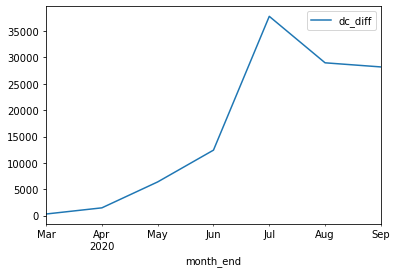

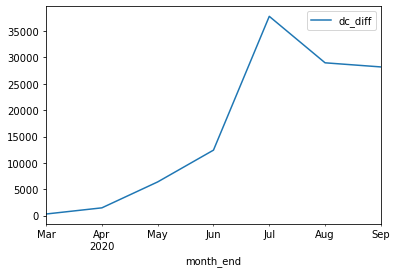

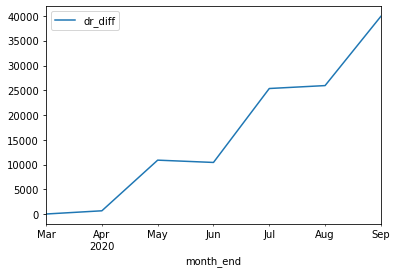

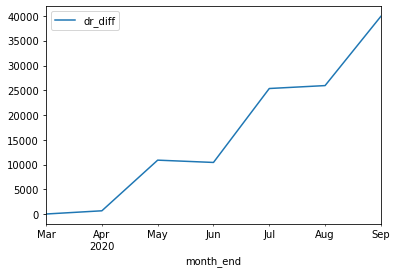

In [ ]:
colls=list(dmdiff_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    dmdiff_dataf.plot(x="month_end",y=i)

In [ ]:
fig,ax=plt.subplots()
ax.plot(list(dmdiff_dataf.index)[:len(list(dmdiff_dataf.index))], dmdiff_dataf['dc_diff'][:len(dmdiff_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Daily_Confirmed / Daily_Recovered (Diff_Value_Min_Max)")
ax.plot(list(dmdiff_dataf.index)[:len(list(dmdiff_dataf.index))], dmdiff_dataf['dr_diff'][:len(ddiff_dataf)])
plt.show()

In [ ]:
fig,ax=plt.subplots()
ax.plot(list(dmdiff_dataf.index)[:len(list(dmdiff_dataf.index))], dmdiff_dataf['dc_diff'][:len(dmdiff_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Daily_Confirmed / Daily_Deceased (Diff_Value_Min_Max)")
ax.plot(list(dmdiff_dataf.index)[:len(list(dmdiff_dataf.index))], dmdiff_dataf['dd_diff'][:len(ddiff_dataf)])
plt.show()

In [ ]:
fig,ax=plt.subplots()
ax.plot(list(dmdiff_dataf.index)[:len(list(dmdiff_dataf.index))], dmdiff_dataf['dr_diff'][:len(dmdiff_dataf)])
ax.set_xlabel("Date")
ax.set_ylabel("Daily_Recovered / Daily_Deceased (Diff_Value_Min_Max)")
ax.plot(list(dmdiff_dataf.index)[:len(list(dmdiff_dataf.index))], dmdiff_dataf['dd_diff'][:len(ddiff_dataf)])
plt.show()

In [ ]:
dt_mrgd.head()

In [ ]:
pcol=['Daily Confirmed','Daily Recovered','Daily Deceased']

In [ ]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            a=len(dt_mrgd)*(np.sum(dt_mrgd[pcol[j]]*dt_mrgd[pcol[k]]))
            b=np.sum(dt_mrgd[pcol[j]])
            c=np.sum(dt_mrgd[pcol[k]])
            d=len(dt_mrgd)*np.sum(dt_mrgd[pcol[j]]**2)
            e=b**2
            f=len(dt_mrgd)*np.sum(dt_mrgd[pcol[k]]**2)
            g=c**2
            r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
            
            print(pcol[j])
            if(k!=3):
                print(pcol[k])
            else:
                print(pcol[k-2])
                
            print(r)
            k=k+1
    else:
        a=len(dt_mrgd)*(np.sum(dt_mrgd[pcol[i]]*dt_mrgd[pcol[i+1]]))
        b=np.sum(dt_mrgd[pcol[i]])
        c=np.sum(dt_mrgd[pcol[i+1]])
        d=len(dt_mrgd)*np.sum(dt_mrgd[pcol[i]]**2)
        e=b**2
        f=len(dt_mrgd)*np.sum(dt_mrgd[pcol[i+1]]**2)
        g=c**2
        k=j+2
        r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
        print(pcol[i])
        print(pcol[i+1])
        print(r)
        
            

In [ ]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            coef,pval=pearsonr(dt_mrgd[pcol[j]],dt_mrgd[pcol[k]])
            print(pcol[j]+" Vs."+pcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(dt_mrgd[pcol[i]],dt_mrgd[pcol[i+1]])
        print(pcol[i]+" Vs."+pcol[i+1])
        print(coef)
        print(pval)

In [ ]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            dt_mrgd.plot(x=pcol[j],y=pcol[k])
            k=k+1
    else:
        dt_mrgd.plot(x=pcol[i],y=pcol[i+1])

In [ ]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            dt_mrgd.plot(x=pcol[j],y=pcol[k],kind="scatter")
            k=k+1
    else:
        dt_mrgd.plot(x=pcol[i],y=pcol[i+1],kind="scatter")

In [ ]:
colls=list(dt_mrgd.columns)
colls.pop(0)
for c in colls:
    min(dt_mrgd[c])
    max(dt_mrgd[c])
    rnge_list=[]
    dys_cnt={}
    if(len(str(max(dt_mrgd[c])))==3):
        rnge_list.append(10**(len(str(max(dt_mrgd[c])))-1))
    elif(len(str(max(dt_mrgd[c])))>3):
        for i in range(1,len(str(max(dt_mrgd[c])))):
            rnge_list.append(10**i)
    cnt1=0


    for i in list(dt_mrgd[c]):

        if(len(str(i))<2 or len(str(i))==2):
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[0]):cnt1})
        else:
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[len(str(i))-2]):cnt1})

    if(len(list(dys_cnt.keys()))>1):
        itr_lst=list(range(1,len(list(dys_cnt.keys()))))
        itr_lst.sort(reverse=True)
        for i in itr_lst:
            dys_cnt[list(dys_cnt.keys())[i]]=dys_cnt[list(dys_cnt.keys())[i]]-dys_cnt[list(dys_cnt.keys())[i-1]]        

    print("For: "+c)
    print(pd.DataFrame(dys_cnt,index=[0]))
    print("\n")
    

In [ ]:
colls=list(dt_mrgd.columns)
colls.pop(0)
for c in colls:
    min(dt_mrgd[c])
    max(dt_mrgd[c])
    rnge_list=[]
    dys_cnt={}
    if(len(str(max(dt_mrgd[c])))==3):
        rnge_list.append(10**(len(str(max(dt_mrgd[c])))-1))
    elif(len(str(max(dt_mrgd[c])))>3):
        for i in range(1,len(str(max(dt_mrgd[c])))):
            rnge_list.append(10**i)
    cnt1=0


    for i in list(dt_mrgd[c]):

        if(len(str(i))<2 or len(str(i))==2):
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[0]):cnt1})
        else:
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[len(str(i))-2]):cnt1})

            

    print("For: "+c)
    print(pd.DataFrame(dys_cnt,index=[0]))
    print("\n")
    